### [OpenAQ REST API](https://api.openaq.org/)

Napisz program w Pythonie, który pobierze dane na temat jakości powietrza we wskazanym mieście z publicznego API "OpenAQ REST API" i wyświetli informacje na temat stężenia [pyłów pm2.5](https://pl.wikipedia.org/wiki/PM2,5)  na wykresie.

Od czerwca 2024 OpenAQ REST API wymaga uwierzytelnienia. 

trzeba sie zalogować - nie jest platne

#### Pobranie danych  o powietrzu w danym mieście

In [13]:
import requests

url = "https://api.openaq.org/v2/measurements?city=Warszawa&limit=50"
headers = {
    'X-API-Key': '4de9524546ae7b94db0a1de27c0259fb9a783ef1183e9b090d2fe3e434a70f34'
}
res = requests.get(url, headers=headers)
res

<Response [200]>

In [18]:
res.text

'{"meta":{"name":"openaq-api","license":"","website":"/","page":1,"limit":50,"found":">50"},"results":[{"locationId":7245,"location":"Warszawa, ul. Kondratowicza","parameter":"pm25","value":21.7,"date":{"utc":"2024-10-27T12:00:00+00:00","local":"2024-10-27T13:00:00+01:00"},"unit":"µg/m³","coordinates":{"latitude":52.290864,"longitude":21.042458},"country":"PL","city":null,"isMobile":false,"isAnalysis":null,"entity":"Governmental Organization","sensorType":"reference grade"},{"locationId":7245,"location":"Warszawa, ul. Kondratowicza","parameter":"pm25","value":25.2,"date":{"utc":"2024-10-27T11:00:00+00:00","local":"2024-10-27T12:00:00+01:00"},"unit":"µg/m³","coordinates":{"latitude":52.290864,"longitude":21.042458},"country":"PL","city":null,"isMobile":false,"isAnalysis":null,"entity":"Governmental Organization","sensorType":"reference grade"},{"locationId":7245,"location":"Warszawa, ul. Kondratowicza","parameter":"pm25","value":30.5,"date":{"utc":"2024-10-27T10:00:00+00:00","local":"20

In [37]:
callable(res.text)

False

In [20]:
data = res.json()
data

{'meta': {'name': 'openaq-api',
  'license': '',
  'website': '/',
  'page': 1,
  'limit': 50,
  'found': '>50'},
 'results': [{'locationId': 7245,
   'location': 'Warszawa, ul. Kondratowicza',
   'parameter': 'pm25',
   'value': 21.7,
   'date': {'utc': '2024-10-27T12:00:00+00:00',
    'local': '2024-10-27T13:00:00+01:00'},
   'unit': 'µg/m³',
   'coordinates': {'latitude': 52.290864, 'longitude': 21.042458},
   'country': 'PL',
   'city': None,
   'isMobile': False,
   'isAnalysis': None,
   'entity': 'Governmental Organization',
   'sensorType': 'reference grade'},
  {'locationId': 7245,
   'location': 'Warszawa, ul. Kondratowicza',
   'parameter': 'pm25',
   'value': 25.2,
   'date': {'utc': '2024-10-27T11:00:00+00:00',
    'local': '2024-10-27T12:00:00+01:00'},
   'unit': 'µg/m³',
   'coordinates': {'latitude': 52.290864, 'longitude': 21.042458},
   'country': 'PL',
   'city': None,
   'isMobile': False,
   'isAnalysis': None,
   'entity': 'Governmental Organization',
   'sensorTy

In [39]:
callable(res.json)

True

#### Analiza i wizualizacja danych

In [21]:
results = data['results']

In [35]:
import datetime


measurements_dt = [
    datetime.datetime.strptime(result['date']['utc'], '%Y-%m-%dT%H:%M:%S%z') for result in results
]
measurements_dt

[datetime.datetime(2024, 10, 27, 12, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2024, 10, 27, 11, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2024, 10, 27, 10, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2024, 10, 27, 9, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2024, 10, 27, 8, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2024, 10, 27, 7, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2024, 10, 27, 6, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2024, 10, 27, 5, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2024, 10, 27, 4, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2024, 10, 27, 3, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2024, 10, 27, 2, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2024, 10, 27, 1, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2024, 10, 27, 0, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2024, 10, 26, 23, 0, tzinfo=datetime.timezone.utc),
 datetime.dateti

In [23]:
pm25 = [result['value'] for result in results]

Text(0.5, 1.0, 'Poziom pm w czasie')

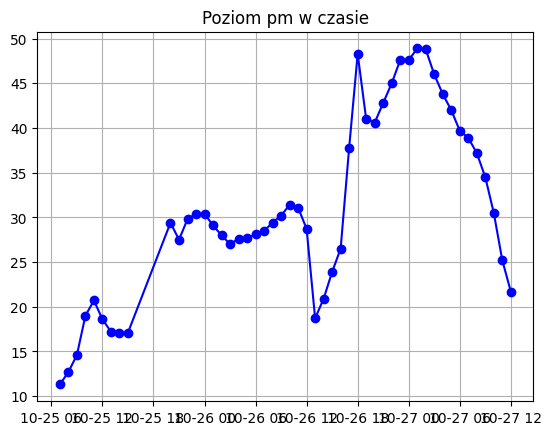

In [36]:
import matplotlib.pyplot as plt
idx = range(len(pm25))
plt.plot(measurements_dt, pm25, marker='o', color = 'b')
plt.grid(True)
plt.title('Poziom pm w czasie')